Useful third-party libraries: exercises
==========

Biopython
------

Can you count the number of sequences in the `data/proteome.faa` file?

In [1]:
from Bio import SeqIO

counter = 0

for seq in SeqIO.parse('../data/proteome.faa', 'fasta'):
    counter += 1
    
counter

4306

Can you plot the distribution of protein sizes in the `data/proteome.faa` file?

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

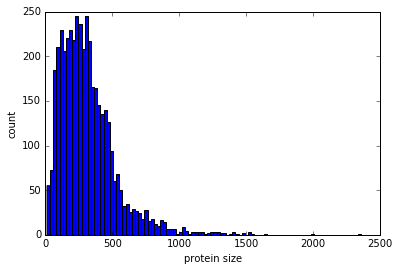

In [8]:
sizes = []
for seq in SeqIO.parse('../data/proteome.faa', 'fasta'):
    sizes.append(len(seq))
    
plt.hist(sizes, bins=100)
plt.xlabel('protein size')
plt.ylabel('count');

Can you count the number of CDS sequences in the `data/ecoli.gbk` file?

In [9]:
counter = 0

for seq in SeqIO.parse('../data/ecoli.gbk', 'genbank'):
    for feat in seq.features:
        if feat.type == 'CDS':
            counter += 1

counter

4319

Can you compute the average root-to-tip distance in the `data/tree.nwk` file?

In [11]:
from Bio import Phylo

tree = Phylo.read('../data/tree.nwk', 'newick')

distances = []
for node in tree.get_terminals():
    distances.append(tree.distance(tree.root, node))
    
sum(distances)/float(len(distances))

0.4553809170833998

Networkx
-------

Can you read the yeast protein interaction network in `data/yeast.gml`? Can you plot the degree distribution of the proteins contained in the graph?

In [15]:
import networkx as nx

In [16]:
graph = nx.read_gml('../data/yeast.gml')

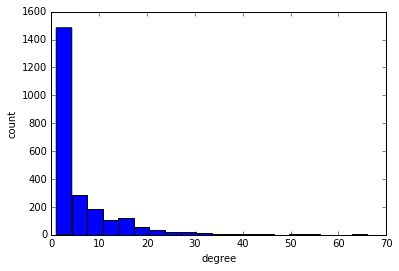

In [23]:
plt.hist(nx.degree(graph).values(), bins=20)
plt.xlabel('degree')
plt.ylabel('count');

Scikit-learn
-------

Can you run (and plot) a PCA on the Iris dataset?

In [27]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

pca = PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

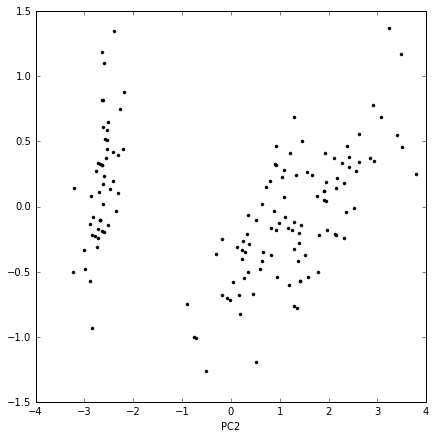

In [30]:
plt.figure(figsize=(7, 7))

plt.plot(X[:, 0],
         X[:, 1],
         'k.')

plt.xlabel('PC1')
plt.xlabel('PC2');

Can you achieve a better f1 score on the Iris dataset using a different classifier?

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(iris.data, iris.target)
preds = clf.predict(iris.data)

metrics.f1_score(iris.target, preds, average=None)

array([ 1.        ,  0.98989899,  0.99009901])